In [69]:
# Import necessary libraries
from sklearn.linear_model import *
from sklearn.metrics import *
from sklearn.linear_model import *
from sklearn.model_selection import *
from sklearn.model_selection import *
from sklearn.model_selection import *
from sklearn.preprocessing import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.linear_model import *
import os

In [70]:
hr = pd.read_csv("HR_comma_sep.csv")
hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.10,0.77,6,247,4,0,1,0,sales,low
3,0.92,0.85,5,259,5,0,1,0,sales,low
4,0.89,1.00,5,224,5,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14990,0.40,0.57,2,151,3,0,1,0,support,low
14991,0.37,0.48,2,160,3,0,1,0,support,low
14992,0.37,0.53,2,143,3,0,1,0,support,low
14993,0.11,0.96,6,280,4,0,1,0,support,low


In [71]:
dum_hr = pd.get_dummies(hr, drop_first=True)

# Separate features (X) and target variable (y)
x = dum_hr.drop(['left'], axis=1)
y = dum_hr['left']
dum_hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,False,False,False,False,False,False,True,False,False,False,True
2,0.10,0.77,6,247,4,0,1,0,False,False,False,False,False,False,True,False,False,True,False
3,0.92,0.85,5,259,5,0,1,0,False,False,False,False,False,False,True,False,False,True,False
4,0.89,1.00,5,224,5,0,1,0,False,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14990,0.40,0.57,2,151,3,0,1,0,False,False,False,False,False,False,False,True,False,True,False
14991,0.37,0.48,2,160,3,0,1,0,False,False,False,False,False,False,False,True,False,True,False
14992,0.37,0.53,2,143,3,0,1,0,False,False,False,False,False,False,False,True,False,True,False
14993,0.11,0.96,6,280,4,0,1,0,False,False,False,False,False,False,False,True,False,True,False


In [72]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=24)

knn = KNeighborsClassifier(n_neighbors=51)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
y_pred_proba = knn.predict_proba(x_test)
print('Confusion matrix: \n',confusion_matrix(y_test,y_pred))
print('Accuracy: ',accuracy_score(y_test,y_pred))
print('Log loss: ',log_loss(y_test,y_pred))

print('Classification report: \n',classification_report(y_test,y_pred))

Confusion matrix: 
 [[3205  224]
 [  94  976]]
Accuracy:  0.929317626139142
Log loss:  2.547650984160759
Classification report: 
               precision    recall  f1-score   support

           0       0.97      0.93      0.95      3429
           1       0.81      0.91      0.86      1070

    accuracy                           0.93      4499
   macro avg       0.89      0.92      0.91      4499
weighted avg       0.93      0.93      0.93      4499



# Plot

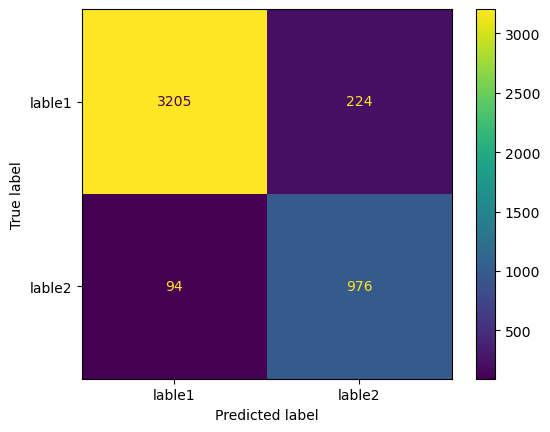

In [73]:

y_pred = knn.predict(x_test)

cm = confusion_matrix(y_test,y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels=['lable1','lable2'])

disp.plot()
plt.show()

# std scaler

In [74]:
std_scaler = StandardScaler()
x_trn_scl = std_scaler.fit_transform(x_train)
knn.fit(x_trn_scl,y_train)

KNeighborsClassifier(n_neighbors=51)

In [75]:
x_tst_scl = std_scaler.transform(x_test)
y_pred_proba = knn.predict_proba(x_tst_scl)
print('log_loss',log_loss(y_test,y_pred_proba[:,1]))

log_loss 0.3132432287223197


# GridSearchCV

In [76]:
params= {'n_neighbors':np.arange(1,40)}

knn=KNeighborsClassifier()
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=24)
gcv = GridSearchCV(knn,param_grid=params,cv =kfold,scoring='neg_log_loss')
gcv.fit(x,y)

print(gcv.best_params_)
print(gcv.best_score_)


{'n_neighbors': 38}
-0.2855897663566085


# Using pipeline 

In [77]:
pipe = Pipeline([('scl',std_scaler),('KNN',knn)])
pipe.fit(x_train,y_train) #(fit_transform apply on first tupple and .fit on second tupple automatically )
y_pred_proba = pipe.predict_proba(x_test)

print(log_loss(y_test,y_pred_proba[:,1]))

0.7175772218036754


 # GridSearchCV using pipe 

In [78]:
params= {'KNN__n_neighbors':np.arange(1,40)} #(dunder)

knn=KNeighborsClassifier()
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=24)
gcv = GridSearchCV(pipe,param_grid=params,cv =kfold,scoring='neg_log_loss')
gcv.fit(x,y)  #(gcv.fit actually a loop)

print(gcv.best_params_)
print(gcv.best_score_)


{'KNN__n_neighbors': 39}
-0.3329779348050666


# min max scaller Concept

In [79]:
a = np.array([40,23,90,102,20,123,50])
min,max = a.min(),a.max()
print(min)
print(max)

(a-min) / (max -min)

20
123


array([0.19417476, 0.02912621, 0.67961165, 0.7961165 , 0.        ,
       1.        , 0.29126214])

# Using min max scaler

In [80]:
mn_scaler = MinMaxScaler()
knn = KNeighborsClassifier()
pipe = Pipeline([('SCL',mn_scaler),('KNN',knn)])
params= {'KNN__n_neighbors':np.arange(1,40)} #(dunder)
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=24)
gcv = GridSearchCV(pipe,param_grid=params,cv =kfold,scoring='neg_log_loss')
gcv.fit(x,y)  #(gcv.fit actually a loop)

print(gcv.best_params_)
print(gcv.best_score_)


{'KNN__n_neighbors': 39}
-0.35124560125812215


# All scaling in one

In [81]:
mn_scaler = MinMaxScaler()
std_scaler = StandardScaler()
knn = KNeighborsClassifier()
pipe = Pipeline([('SCL',mn_scaler),('KNN',knn)])
params= {'KNN__n_neighbors':np.arange(1,40),
         'SCL':[None,std_scaler,mn_scaler]} #(dunder)
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=24)
gcv = GridSearchCV(pipe,param_grid=params,cv =kfold,scoring='neg_log_loss')
gcv.fit(x,y)  #(gcv.fit actually a loop)

print(gcv.best_params_)
print(gcv.best_score_)


{'KNN__n_neighbors': 38, 'SCL': None}
-0.2855897663566085


# without scaler

In [82]:
params= {'n_neighbors':np.arange(1,40)} #(dunder)
knn =KNeighborsClassifier()
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=24)
gcv = GridSearchCV(knn,param_grid=params,cv =kfold,scoring='neg_log_loss')
gcv.fit(x,y)  #(gcv.fit actually a loop)

print(gcv.best_params_)
print(gcv.best_score_)


{'n_neighbors': 38}
-0.2855897663566085


# With standard scaler

In [83]:
std_scaler = StandardScaler()
knn = KNeighborsClassifier()
pipe = Pipeline([('SCL',std_scaler),('KNN',knn)])
params= {'KNN__n_neighbors':np.arange(1,40)} #(dunder)
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=24)
gcv = GridSearchCV(pipe,param_grid=params,cv =kfold,scoring='neg_log_loss')
gcv.fit(x,y)  #(gcv.fit actually a loop)

print(gcv.best_params_)
print(gcv.best_score_)


{'KNN__n_neighbors': 39}
-0.3329779348050666


# With min max scaler

In [84]:
mn_scaler = MinMaxScaler()
knn = KNeighborsClassifier()
pipe = Pipeline([('SCL',mn_scaler),('KNN',knn)])
params= {'KNN__n_neighbors':np.arange(1,40)} #(dunder)
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=24)
gcv = GridSearchCV(pipe,param_grid=params,cv =kfold,scoring='neg_log_loss')
gcv.fit(x,y)  #(gcv.fit actually a loop)

print(gcv.best_params_)
print(gcv.best_score_)


{'KNN__n_neighbors': 39}
-0.35124560125812215


# Conclusion : without scaling we are getting best result (log loss is minimum ) 😀